<a href="https://colab.research.google.com/github/anruki/Quantum-Programming-Applications/blob/main/svm_classic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Importar las bibliotecas necesarias
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = datasets.make_blobs(n_samples=100, centers=2, random_state=6)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Calcular la matriz de gram (kernel lineal) para los datos de entrenamiento
K_train = np.dot(X_train, X_train.T)

# Crear el modelo SVM con un kernel lineal precomputado
svm_model = SVC(kernel='precomputed')

# Entrenar el modelo SVM con la matriz de gram
svm_model.fit(K_train, y_train)

# Calcular la matriz de gram (kernel lineal) para los datos de prueba
K_test = np.dot(X_test, X_train.T)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_model.predict(K_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 1.00


In [14]:
K_test

array([[ 94.73267204,  89.75854565,  74.64971182, ..., 107.6388784 ,
         92.87624322, 140.82672819],
       [ 74.73846687,  68.8111579 ,  50.63957395, ...,  56.86333753,
         80.86135352,  74.11013161],
       [ 59.12975016,  54.67676869,  41.03817687, ...,  48.2997107 ,
         63.07825657,  62.99949034],
       ...,
       [ 90.49252032,  86.21955872,  73.28051201, ..., 109.52404747,
         86.90650642, 143.36138474],
       [ 81.33593418,  74.89256951,  55.13929034, ...,  61.98335521,
         87.97214551,  80.78459101],
       [ 86.0448131 ,  82.22772242,  70.69196624, ..., 107.58476373,
         81.70374526, 140.85587612]])

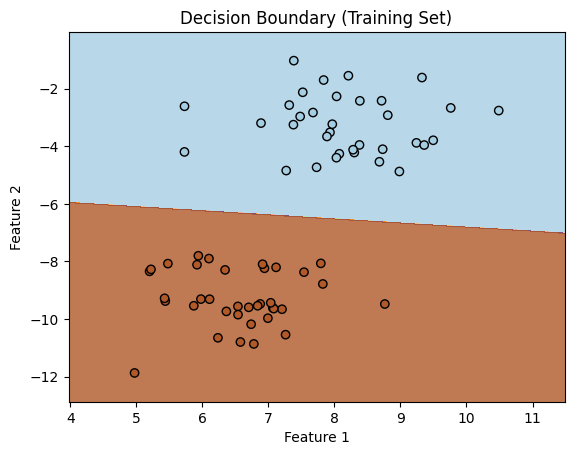

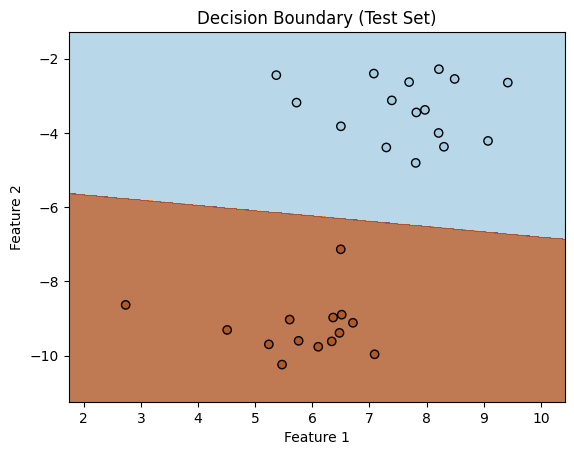

In [15]:

# Visualizar los resultados
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    # Crear una malla de puntos para graficar la frontera de decisión
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Calcular la matriz de gram para los puntos de la malla
    Z = model.predict(np.dot(np.c_[xx.ravel(), yy.ravel()], X_train.T))
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión y los puntos de datos
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Graficar la frontera de decisión para el conjunto de entrenamiento
plot_decision_boundary(svm_model, X_train, y_train, title="Decision Boundary (Training Set)")

# Graficar la frontera de decisión para el conjunto de prueba
plot_decision_boundary(svm_model, X_test, y_test, title="Decision Boundary (Test Set)")